In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.0 MB/s eta 0:00:005.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


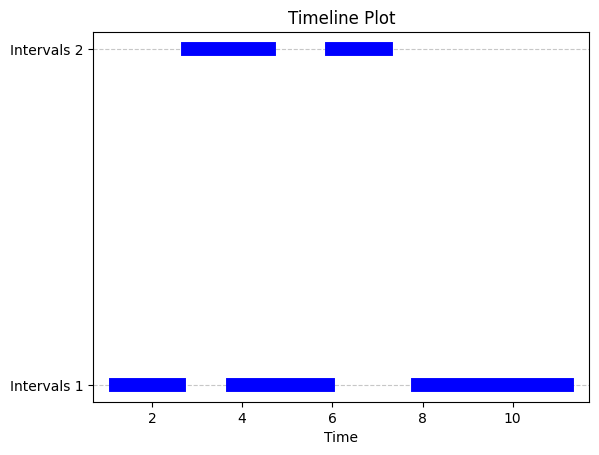

In [2]:
import matplotlib.pyplot as plt

def plot_timeline(intervals, label):
    for start, end in intervals:
        plt.plot([start, end], [label, label], color='blue', linewidth=10)

# Intervals
intervals1 = [(1.2, 2.6), (3.8, 5.9), (7.9, 11.2)]
intervals2 = [(2.8, 4.6), (6.0, 7.2)]

# Plot timelines
plot_timeline(intervals1, 1)
plot_timeline(intervals2, 2)

# Customize the plot
plt.xlabel('Time')
plt.yticks([1, 2], ['Intervals 1', 'Intervals 2'])
plt.title('Timeline Plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

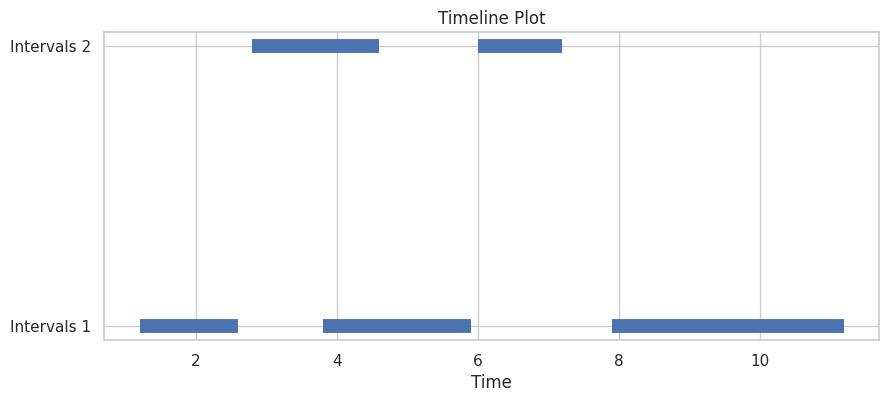

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_timeline(intervals, label):
    for start, end in intervals:
        plt.hlines(label, start, end, linewidth=10)

# Intervals
intervals1 = [(1.2, 2.6), (3.8, 5.9), (7.9, 11.2)]
intervals2 = [(2.8, 4.6), (6.0, 7.2)]

# Create a Seaborn plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 4))

# Plot timelines
plot_timeline(intervals1, 1)
plot_timeline(intervals2, 2)

# Customize the plot
plt.xlabel('Time')
plt.yticks([1, 2], ['Intervals 1', 'Intervals 2'])
plt.title('Timeline Plot')

# Show the plot
plt.show()


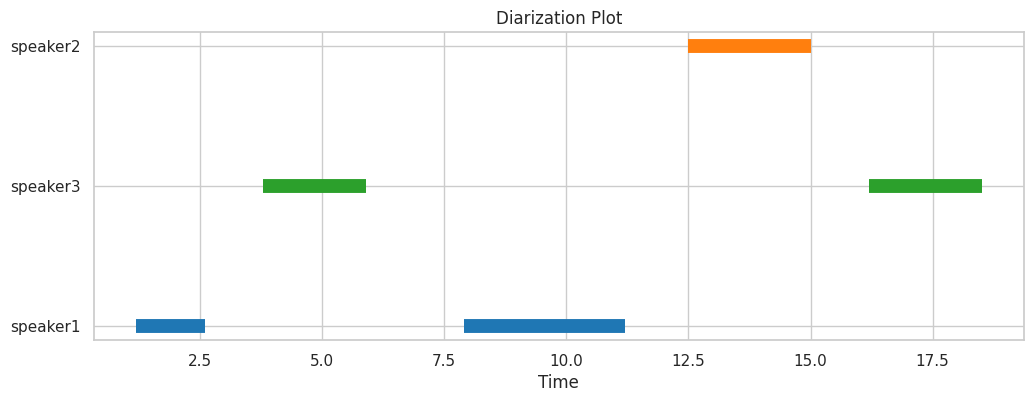

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_diarization(intervals, labels):
    cmap = plt.get_cmap('tab10')  # Choose a colormap, e.g., 'tab10'
    unique_labels = set(labels)
    label_to_color = {label: cmap(i) for i, label in enumerate(unique_labels)}

    for (start, end), label in zip(intervals, labels):
        plt.hlines(label, start, end, color=label_to_color[label], linewidth=10)

# Intervals and corresponding labels
intervals = [(1.2, 2.6), (3.8, 5.9), (7.9, 11.2), (12.5, 15.0), (16.2, 18.5)]
labels = ['speaker1', 'speaker2', 'speaker1', 'speaker3', 'speaker2']

# Create a colorful diarization plot
plt.figure(figsize=(12, 4))

# Plot diarization
plot_diarization(intervals, labels)

# Customize the plot
plt.xlabel('Time')
plt.yticks(range(len(set(labels))), set(labels))
plt.title('Diarization Plot')

# Show the plot
plt.show()


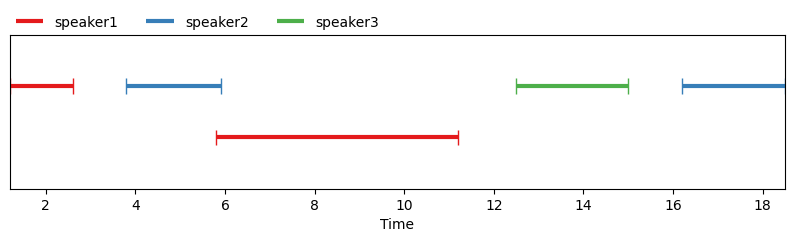

In [6]:
from pyannote.core import Segment, Annotation
from pyannote.core import notebook
import matplotlib.pyplot as plt

# Create a custom diarization result
custom_diarization = Annotation()
custom_diarization[Segment(1.2, 2.6)] = 'speaker1'
custom_diarization[Segment(3.8, 5.9)] = 'speaker2'
custom_diarization[Segment(5.8, 11.2)] = 'speaker1'
custom_diarization[Segment(12.5, 15.0)] = 'speaker3'
custom_diarization[Segment(16.2, 18.5)] = 'speaker2'

# Create a figure
fig, ax = plt.subplots(figsize=(10, 2))

# Plot the custom diarization result
notebook.plot_annotation(custom_diarization, ax, legend=True)

# Customize the plot (if needed)
ax.set_xlabel('Time')
ax.set_yticks([])  # To hide the y-axis

# Save the figure
fig.savefig('custom_diarization_plot.png', bbox_inches='tight')

# Show the figure (optional)
plt.show()

In [1]:
import json
with open('output.json', 'r') as json_file:
    loaded_list = json.load(json_file)

In [2]:
loaded_list[0]

[{'track': 0,
  'score': -1.0666666825612385,
  's': 72.29749870300293,
  'x': 106.30376434326172,
  'y': 88.0403003692627},
 {'track': 1,
  'score': 2.3999999364217124,
  's': 68.65208148956299,
  'x': 510.92138671875,
  'y': 60.32396221160889},
 {'track': 2,
  'score': -1.2000000476837158,
  's': 40.90107727050781,
  'x': 299.64306640625,
  'y': 30.711134910583496}]

In [15]:
def convert_to_ranges(lst):
    ranges = []
    start = lst[0]
    
    for i in range(1, len(lst)):
        if lst[i] - lst[i-1] > 0.08:
            ranges.append((start, lst[i-1]))
            start = lst[i]

    # Add the last range
    ranges.append((start, lst[-1]))

    return ranges

In [16]:
tracks = {}
for count, item in enumerate(loaded_list):
    for track in item:
        if track["score"] > 0:
            if track["track"] in tracks.keys():
                tracks[track["track"]].append(count/25)
            else:
                tracks[track["track"]] = [count/25]

for key in tracks.keys():
    tracks[key] = convert_to_ranges(tracks[key])

In [17]:
tracks

{1: [(0.0, 17.88)], 6: [(17.04, 17.76)], 2: [(18.84, 19.68), (19.76, 19.96)]}

In [7]:
convert_to_ranges(tracks[1])

[(0.0, 17.88)]

In [6]:
import numpy as np
import pickle

In [3]:
item1 = {1: [np.array([1.2, 2.4, 1.2])], 2: [np.array([1.2, 2.4, 1.2])]}
item2 = [np.array([1.2, 2.4, 1.2]), np.array([1.2, 2.4, 1.2])]

In [5]:
item2

[array([1.2, 2.4, 1.2]), array([1.2, 2.4, 1.2])]

In [7]:
with open('data1.pkl', 'wb') as pickle_file:
    pickle.dump(item1, pickle_file)
with open('data2.pkl', 'wb') as pickle_file:
    pickle.dump(item2, pickle_file)

In [8]:
with open('data1.pkl', 'rb') as pickle_file:
    item1 = pickle.load(pickle_file)
with open('data2.pkl', 'rb') as pickle_file:
    item2 = pickle.load(pickle_file)

In [6]:
import pickle
with open('TalkNet-ASD/Videos/001/pywork/scores.pckl', 'rb') as pickle_file:
    item2 = pickle.load(pickle_file)

In [14]:
for num, item in enumerate(item1):
    print(num)
    print(item.shape)
    print(item.size)
    print(item[0])
    print(item[-1])

0
(492,)
492
-1.100000023841858
-1.2999999523162842
1
(499,)
499
1.399999976158142
-1.899999976158142
2
(499,)
499
-1.2000000476837158
0.30000001192092896
3
(15,)
15
-1.399999976158142
-1.100000023841858
4
(100,)
100
-0.5
-0.699999988079071
5
(36,)
36
-0.800000011920929
-1.2000000476837158
6
(28,)
28
0.4000000059604645
-0.6000000238418579


In [15]:
for num, item in enumerate(item2):
    print(num)
    print(item.shape)
    print(item.size)
    print(item[0])
    print(item[-1])

0
(492,)
492
-1.100000023841858
-1.2999999523162842
1
(499,)
499
1.399999976158142
-1.899999976158142
2
(499,)
499
-1.2000000476837158
0.30000001192092896
3
(15,)
15
-1.399999976158142
-1.100000023841858
4
(100,)
100
-0.5
-0.699999988079071
5
(36,)
36
-0.800000011920929
-1.2000000476837158
6
(28,)
28
0.4000000059604645
-0.6000000238418579


In [2]:
def create_webvtt_file(sentences, sentence_timestamps, word_timestamps):
    webvtt_content = "WEBVTT\n\n"

    for i, sentence in enumerate(sentences):
        webvtt_content += f"{i+1}\n"
        webvtt_content += f"{sentence_timestamps[i]} --> {sentence_timestamps[i+1]}\n"
        webvtt_content += f"{sentence}\n\n"

        for word in sentence.split():
            webvtt_content += f"<v {word_timestamps[word]}>{word}</v> "

        webvtt_content += "\n\n"

    with open("../../Clips/Set 2/zzz.vtt", "w") as file:
        file.write(webvtt_content)

In [ ]:
# Example usage
sentences = ["Hello world!", "This is a test sentence."]
sentence_timestamps = ["00:00:00.000", "00:00:02.500", "00:00:03.500"]
word_timestamps = {
    "Hello": "00:00:00.000 --> 00:00:01.000",
    "world!": "00:00:01.000 --> 00:00:02.500",
    "This": "00:00:02.500 --> 00:00:03.000",
    "is": "00:00:03.000 --> 00:00:03.500",
    "a": "00:00:03.500 --> 00:00:04.000",
    "test": "00:00:04.000 --> 00:00:04.500",
    "sentence.": "00:00:04.500 --> 00:00:05.000"
}

def create_vtt(sentences, sentence_timestamps, word_timestamps):
    vtt = "WEBVTT\n\n"
    for i, sentence in enumerate(sentences):
        vtt += f"{i+1}\n{sentence_timestamps[i]}\n"
        words = sentence.split()
        for word in words:
            vtt += f"{word_timestamps[word]}\n{word}\n"
        vtt += "\n"

    with open("../../Clips/Set 2/zzz.vtt", "w") as f:
        f.write(vtt)
    return vtt


In [3]:
# Example usage
sentences = ["Hello world!", "This is a test sentence."]
sentence_timestamps = ["00:00:00.000", "00:00:02.500", "00:00:03.500"]
word_timestamps = {
    "Hello": "00:00:00.000 --> 00:00:01.000",
    "world!": "00:00:01.000 --> 00:00:02.500",
    "This": "00:00:02.500 --> 00:00:03.000",
    "is": "00:00:03.000 --> 00:00:03.500",
    "a": "00:00:03.500 --> 00:00:04.000",
    "test": "00:00:04.000 --> 00:00:04.500",
    "sentence.": "00:00:04.500 --> 00:00:05.000"
}

create_webvtt_file(sentences, sentence_timestamps, word_timestamps)
